In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [3]:
# Attempt to load the data using a different encoding
df = pd.read_csv('spotify.csv', encoding='latin1')

# Display the first few rows of the data and basic info
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

(                        Track                    Album Name          Artist  \
 0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
 1                 Not Like Us                   Not Like Us  Kendrick Lamar   
 2  i like the way you kiss me    I like the way you kiss me         Artemas   
 3                     Flowers              Flowers - Single     Miley Cyrus   
 4                     Houdini                       Houdini          Eminem   
 
   Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
 0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
 1     5/4/2024  USUG12400910             2        545.9     323,703,884   
 2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
 3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
 4    5/31/2024  USUG12403398             5        423.3     107,034,922   
 
   Spotify Playlist Count Spotify Playlist Reach  ...  Siriu

In [4]:
# Copy the dataset for cleaning
spotify = df.copy()

# Convert 'Release Date' to datetime
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'], errors='coerce')

# Convert numeric columns stored as strings to numeric types
numeric_columns = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 
    'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 
    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts'
]

for column in numeric_columns:
    spotify[column] = spotify[column].astype(str)
    spotify[column] = pd.to_numeric(spotify[column].str.replace(',', ''), errors='coerce')

# Display the data types and check for missing values
spotify.info(), spotify.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

(None,
 Track                            0
 Album Name                       0
 Artist                           5
 Release Date                     0
 ISRC                             0
 All Time Rank                    0
 Track Score                      0
 Spotify Streams                113
 Spotify Playlist Count          70
 Spotify Playlist Reach          72
 Spotify Popularity             804
 YouTube Views                  308
 YouTube Likes                  315
 TikTok Posts                  1173
 TikTok Likes                   980
 TikTok Views                   981
 YouTube Playlist Reach        1009
 Apple Music Playlist Count     561
 AirPlay Spins                  498
 SiriusXM Spins                2123
 Deezer Playlist Count          921
 Deezer Playlist Reach          928
 Amazon Playlist Count         1055
 Pandora Streams               1106
 Pandora Track Stations        1268
 Soundcloud Streams            3333
 Shazam Counts                  577
 TIDAL Popularity    

In [5]:
# Impute missing values using the median for numeric columns
spotify_df = spotify.copy()

# Apply median imputation for numeric columns
spotify_df[numeric_columns] = spotify_df[numeric_columns].fillna(spotify_df[numeric_columns].median())

# Check if there are any remaining missing values in the dataset
remaining_missing_values = spotify_df.isnull().sum()

remaining_missing_values


Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                  0
Spotify Playlist Count           0
Spotify Playlist Reach           0
Spotify Popularity             804
YouTube Views                    0
YouTube Likes                    0
TikTok Posts                     0
TikTok Likes                     0
TikTok Views                     0
YouTube Playlist Reach           0
Apple Music Playlist Count     561
AirPlay Spins                    0
SiriusXM Spins                   0
Deezer Playlist Count            0
Deezer Playlist Reach            0
Amazon Playlist Count            0
Pandora Streams                  0
Pandora Track Stations           0
Soundcloud Streams               0
Shazam Counts                    0
TIDAL Popularity              4600
Explicit Track      

In [6]:
# Select the top 20 streamed songs based on Spotify Streams
top_20_songs = spotify_df.sort_values(by='Spotify Streams', ascending=False).head(20)

# Select the top 20 streamed songs from 2024
top_20_songs_2024 = spotify_df[spotify_df['Release Date'].dt.year == 2024].sort_values(by='Spotify Streams', ascending=False).head(20)

In [7]:
# Function to create a combined horizontal bar plot for two platforms
def create_combined_horizontal_bar_plot(data1, data2, labels, platform1, platform2, color1, color2, title):
    plt.figure(figsize=(12, 10))
    y_pos = np.arange(len(labels))

    # Create horizontal bars
    bars1 = plt.barh(y_pos - 0.2, data1, height=0.4, label=platform1, color=color1, edgecolor='black')
    bars2 = plt.barh(y_pos + 0.2, data2, height=0.4, label=platform2, color=color2, edgecolor='black')

    # Add text labels
    for bar1, bar2 in zip(bars1, bars2):
        width1 = bar1.get_width()
        width2 = bar2.get_width()
        plt.text(width1 + 1e6, bar1.get_y() + bar1.get_height()/2, f'{width1/1e6:.1f} mil', 
                 va='center', ha='left', fontsize=10, color='white')
        plt.text(width2 + 1e6, bar2.get_y() + bar2.get_height()/2, f'{width2/1e6:.1f} mil', 
                 va='center', ha='left', fontsize=10, color='white')

    # Labels and title
    plt.yticks(y_pos, labels, color='white')
    plt.xlabel('Streams/Views Count', color='white')
    plt.title(title, color='white')
    plt.gca().set_facecolor('#2b2b2b')
    plt.gcf().set_facecolor('#2b2b2b')
    plt.xticks(color='white')
    plt.legend(loc='upper right', facecolor='#2b2b2b', framealpha=0.3)
    plt.tight_layout()
    plt.show()

# Labels for the tracks
labels = top_20_songs['Track']

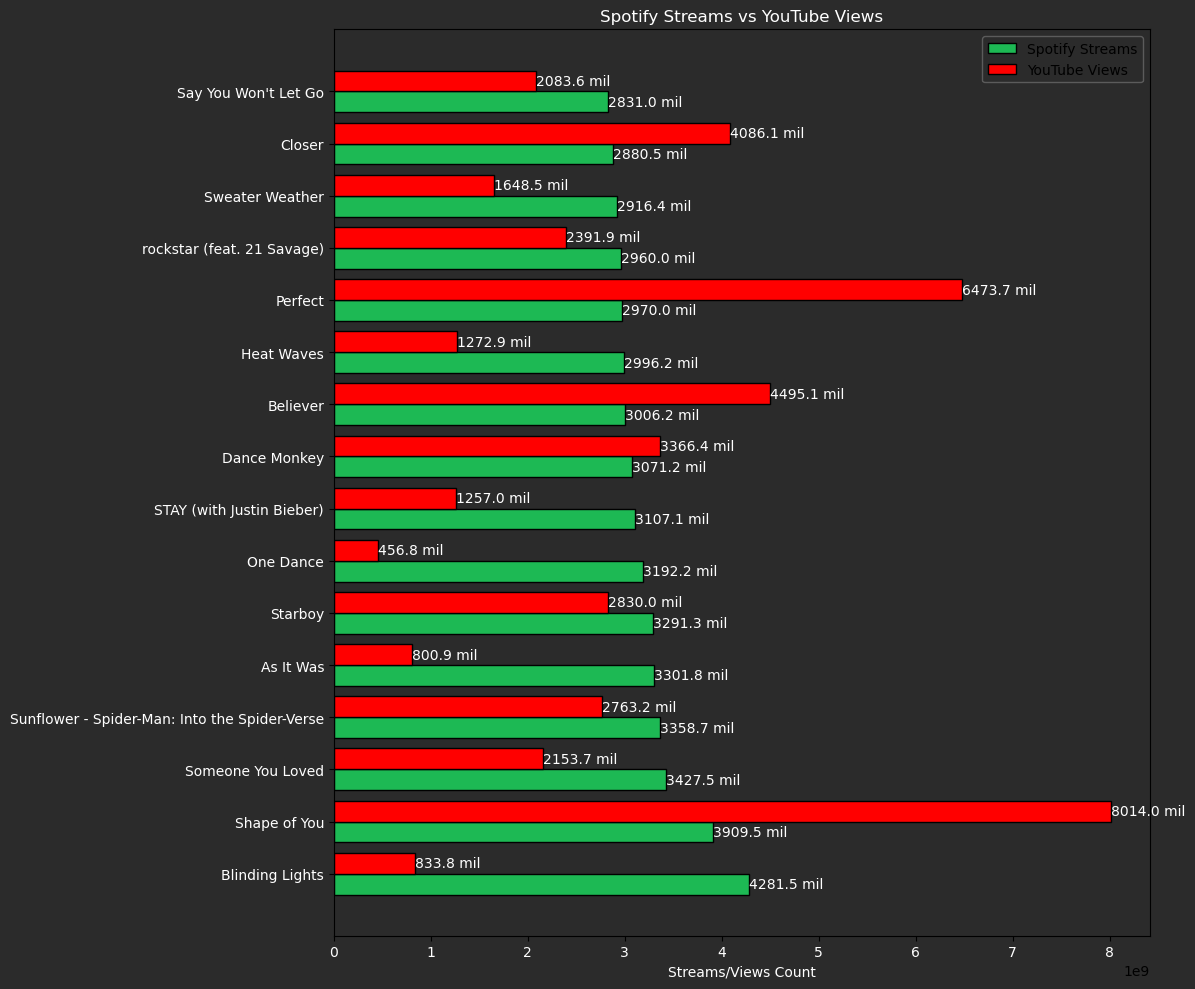

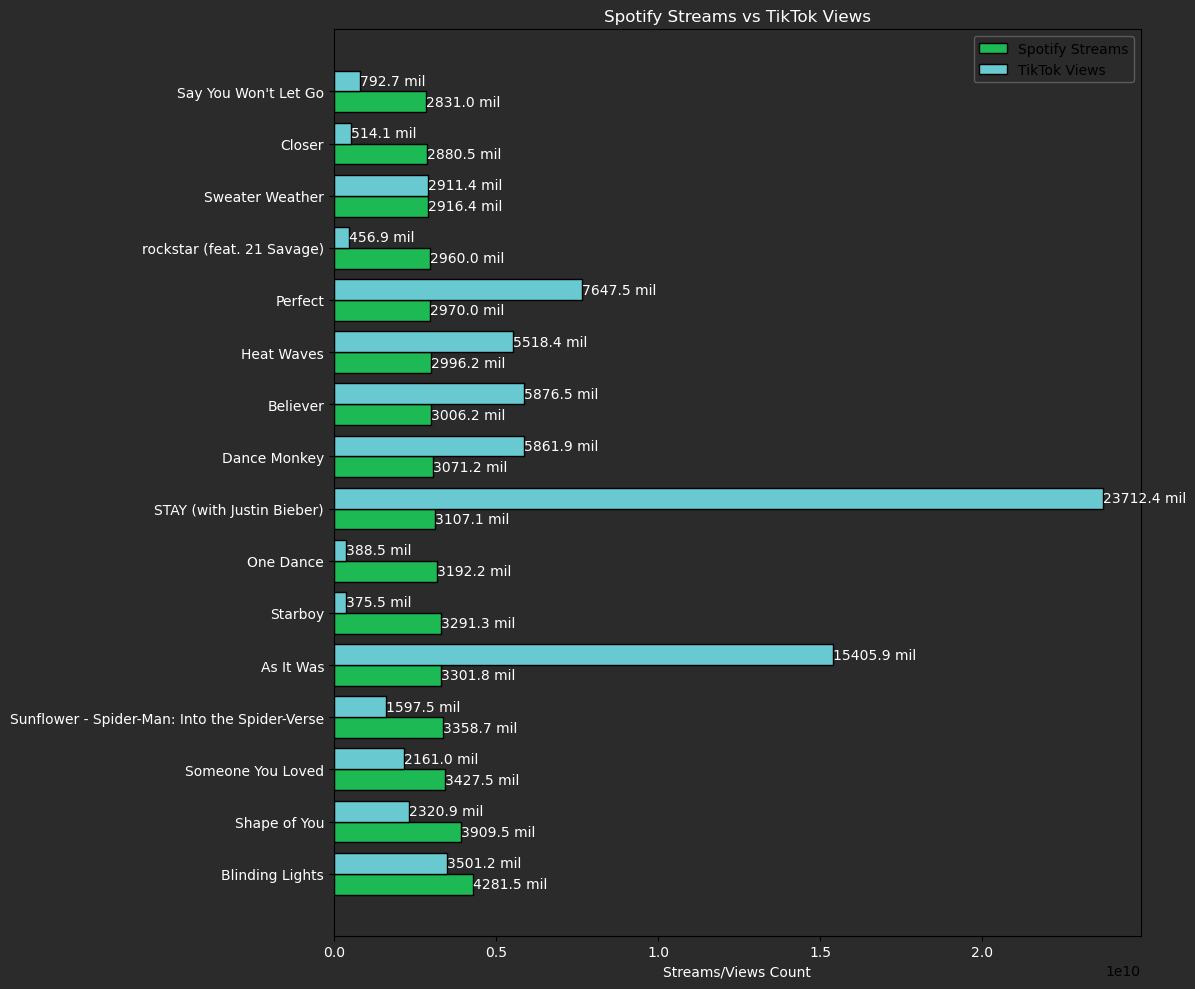

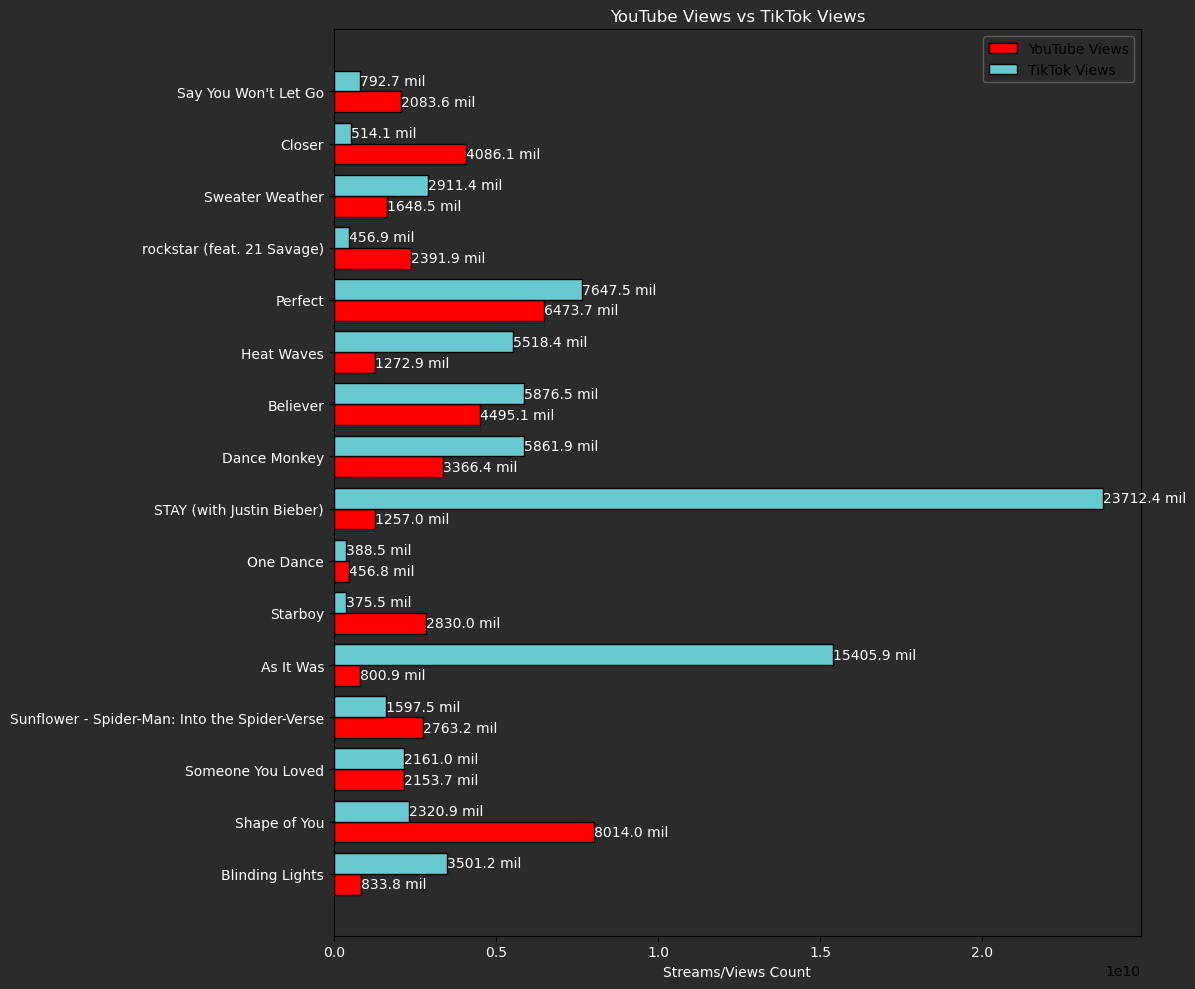

In [8]:
# Remove duplicates based on the 'Track' name while keeping the first occurrence
top_20_songs_unique = top_20_songs.drop_duplicates(subset='Track', keep='first')

# Labels for the unique tracks
unique_labels = top_20_songs_unique['Track']

# Plot 1: Spotify Streams vs YouTube Views (Unique Tracks)
create_combined_horizontal_bar_plot(top_20_songs_unique['Spotify Streams'], top_20_songs_unique['YouTube Views'], 
                                    unique_labels, 'Spotify Streams', 'YouTube Views', 
                                    '#1DB954', '#FF0000', 'Spotify Streams vs YouTube Views')

# Plot 2: Spotify Streams vs TikTok Views (Unique Tracks)
create_combined_horizontal_bar_plot(top_20_songs_unique['Spotify Streams'], top_20_songs_unique['TikTok Views'], 
                                    unique_labels, 'Spotify Streams', 'TikTok Views', 
                                    '#1DB954', '#69C9D0', 'Spotify Streams vs TikTok Views')

# Plot 3: YouTube Views vs TikTok Views (Unique Tracks)
create_combined_horizontal_bar_plot(top_20_songs_unique['YouTube Views'], top_20_songs_unique['TikTok Views'], 
                                    unique_labels, 'YouTube Views', 'TikTok Views', 
                                    '#FF0000', '#69C9D0', 'YouTube Views vs TikTok Views')


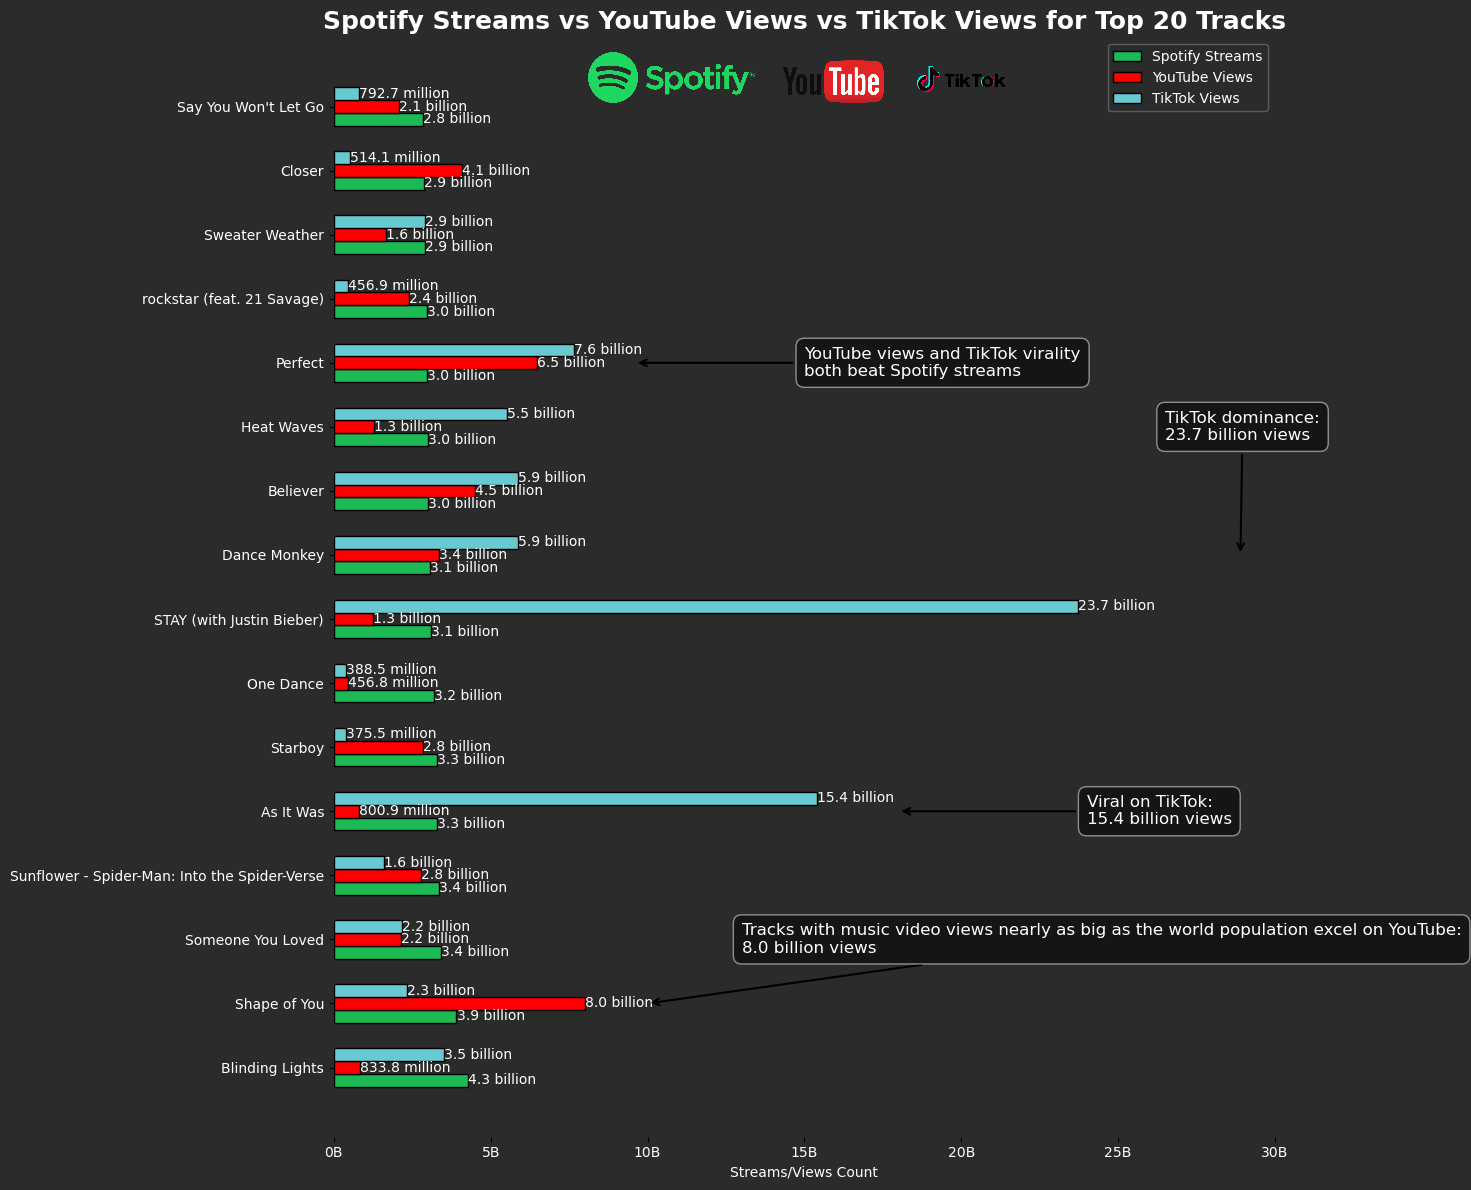

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Load the logos
spotify_logo = mpimg.imread('/Users/yonathanamare/Downloads/Spotify_logo_with_text.svg.png')
youtube_logo = mpimg.imread('/Users/yonathanamare/Downloads/81df95254429d24f564f57bbc27d4256.png')
tiktok_logo = mpimg.imread('/Users/yonathanamare/Downloads/TikTok_logo.svg.png')

# Labels for the unique tracks
labels = top_20_songs_unique['Track']

# Create a combined horizontal bar plot for Spotify Streams, YouTube Views, and TikTok Views
plt.figure(figsize=(14, 12))
y_pos = np.arange(len(labels))

# Plot settings
bar_width = 0.2

# Create horizontal bars for each platform
bars_spotify = plt.barh(y_pos - bar_width, top_20_songs_unique['Spotify Streams'], height=bar_width, label='Spotify Streams', color='#1DB954', edgecolor='black')
bars_youtube = plt.barh(y_pos, top_20_songs_unique['YouTube Views'], height=bar_width, label='YouTube Views', color='#FF0000', edgecolor='black')
bars_tiktok = plt.barh(y_pos + bar_width, top_20_songs_unique['TikTok Views'], height=bar_width, label='TikTok Views', color='#69C9D0', edgecolor='black')

# Add text labels
# Add text labels with "mil" or "bil" based on the value
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        width = bar.get_width()
        if width >= 1e9:
            plt.text(width + 1e6, bar.get_y() + bar.get_height()/2, f'{width/1e9:.1f} billion', 
                     va='center', ha='left', fontsize=10, color='white')
        else:
            plt.text(width + 1e6, bar.get_y() + bar.get_height()/2, f'{width/1e6:.1f} million', 
                     va='center', ha='left', fontsize=10, color='white')

# Labels and title
plt.yticks(y_pos, labels, color='white')
plt.xlabel('Streams/Views Count', color='white')
plt.title('Spotify Streams vs YouTube Views vs TikTok Views for Top 20 Tracks', color='white', fontsize = 18, fontweight = 'bold', loc = 'center')
plt.gca().set_facecolor('#2b2b2b')
plt.gcf().set_facecolor('#2b2b2b')
plt.xticks(color='white')

# Set x-ticks to range from 0 to 30 billion
plt.xticks(np.arange(0, 31e9, step=5e9), labels=[f'{int(x/1e9)}B' for x in np.arange(0, 31e9, step=5e9)], color='white')

# Add a legend
legend = plt.legend(loc='upper right', facecolor='#2b2b2b', framealpha=0.3)
plt.setp(legend.get_texts(), color='white')

# Remove the spines (the black lines around the plot)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Function to add logos near the title
def add_logo_to_title(ax, logo, position):
    imagebox = OffsetImage(logo, zoom=0.1)
    ab = AnnotationBbox(imagebox, position, xycoords='axes fraction', box_alignment=(0, 0), frameon=False)
    ax.add_artist(ab)

# Add logos to the title
add_logo_to_title(plt.gca(), spotify_logo, (0.27, 0.94))
add_logo_to_title(plt.gca(), youtube_logo, (0.47, 0.93))
add_logo_to_title(plt.gca(), tiktok_logo, (0.62, 0.95))

# Add specific annotations to the plot

# Annotation 1: TikTok dominance
plt.annotate('TikTok dominance:\n23.7 billion views', xy=(2.89e10, y_pos[8]), xytext=(2.65e10, y_pos[10]),
             textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

# Annotation 2: YouTube success
plt.annotate('Tracks with music video views nearly as big as the world population excel on YouTube:\n8.0 billion views',
             xy=(10.0e9, y_pos[1]), xytext=(1.3e10, y_pos[2]), textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

# Annotation 3: Viral on TikTok
plt.annotate('Viral on TikTok:\n15.4 billion views', xy=(1.8e10, y_pos[4]), xytext=(2.4e10, y_pos[4]),
             textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

# Annotation 4: YouTube and TikTok Beat Spotify for "Perfect"
plt.annotate('YouTube views and TikTok virality\nboth beat Spotify streams', xy=(9.6e9, y_pos[11]), xytext=(1.5e10, y_pos[11]),
             textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.show()

